In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with open("names.txt", 'r') as f:
    names = f.read().splitlines()
    
print(names[:5])

['emma', 'olivia', 'ava', 'isabella', 'sophia']


In [4]:
# here we study a character level model, specifically a Bigram model.
# get all the pair chars (bigrams) in the names,
# here shown as an eample for one name
for name in names[:1]:
    for ch1, ch2 in zip(name, name[1:]):
        print(ch1, ch2)
        
# we have a bit more information here, some characters are more likely 
# at the begining or at the end of words (the <S> and <E> tokens)
for name in names[:1]:
    name = ["<S>"] + list(name) + ["<E>"]
    for ch1, ch2 in zip(name, name[1:]):
        print(ch1, ch2)

e m
m m
m a
<S> e
e m
m m
m a
a <E>


In [5]:
# we want to count the number of times a certain bigram occures
bigram_counts = {}
for name in names:
    name = ["<S>"] + list(name) + ["<E>"]
    for ch1, ch2 in zip(name, name[1:]):
        bigram = (ch1, ch2)
        # if the bigram isn't already in the counts dict, put 0 by default as the count
        bigram_counts[bigram] = bigram_counts.get(bigram, 0) + 1

sorted(bigram_counts.items(), key = lambda k: -k[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [6]:
# unique chars in the names, we have also two special start and end chars
unique_chars = sorted(list(set([ch for name in names for ch in name])))
len_unique_chars = len(unique_chars) + 2
print(f"number of unique chars: {len_unique_chars}")

# mapping from unique chars to integers (indices)
ctoi = {c: i for i, c in enumerate(unique_chars)}
ctoi["<S>"] = 26
ctoi["<E>"] = 27
print("ctoi:\n", ctoi)

# the inverse mapping of chars to ints
itoc = {i: c for c, i in ctoi.items()}
print("itoc:\n", itoc)

number of unique chars: 28
ctoi:
 {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, '<S>': 26, '<E>': 27}
itoc:
 {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z', 26: '<S>', 27: '<E>'}


In [7]:
# we put the counts info into a torch tensor object, with element ij, 
# being the number of times the i'th character follows the j'th character
N = torch.zeros((28, 28), dtype=torch.int32)

for name in names:
    name = ["<S>"] + list(name) + ["<E>"]
    for ch1, ch2 in zip(name, name[1:]):
        i = ctoi[ch1]
        j = ctoi[ch2]
        N[i, j] += 1
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

(-0.5, 27.5, 27.5, -0.5)

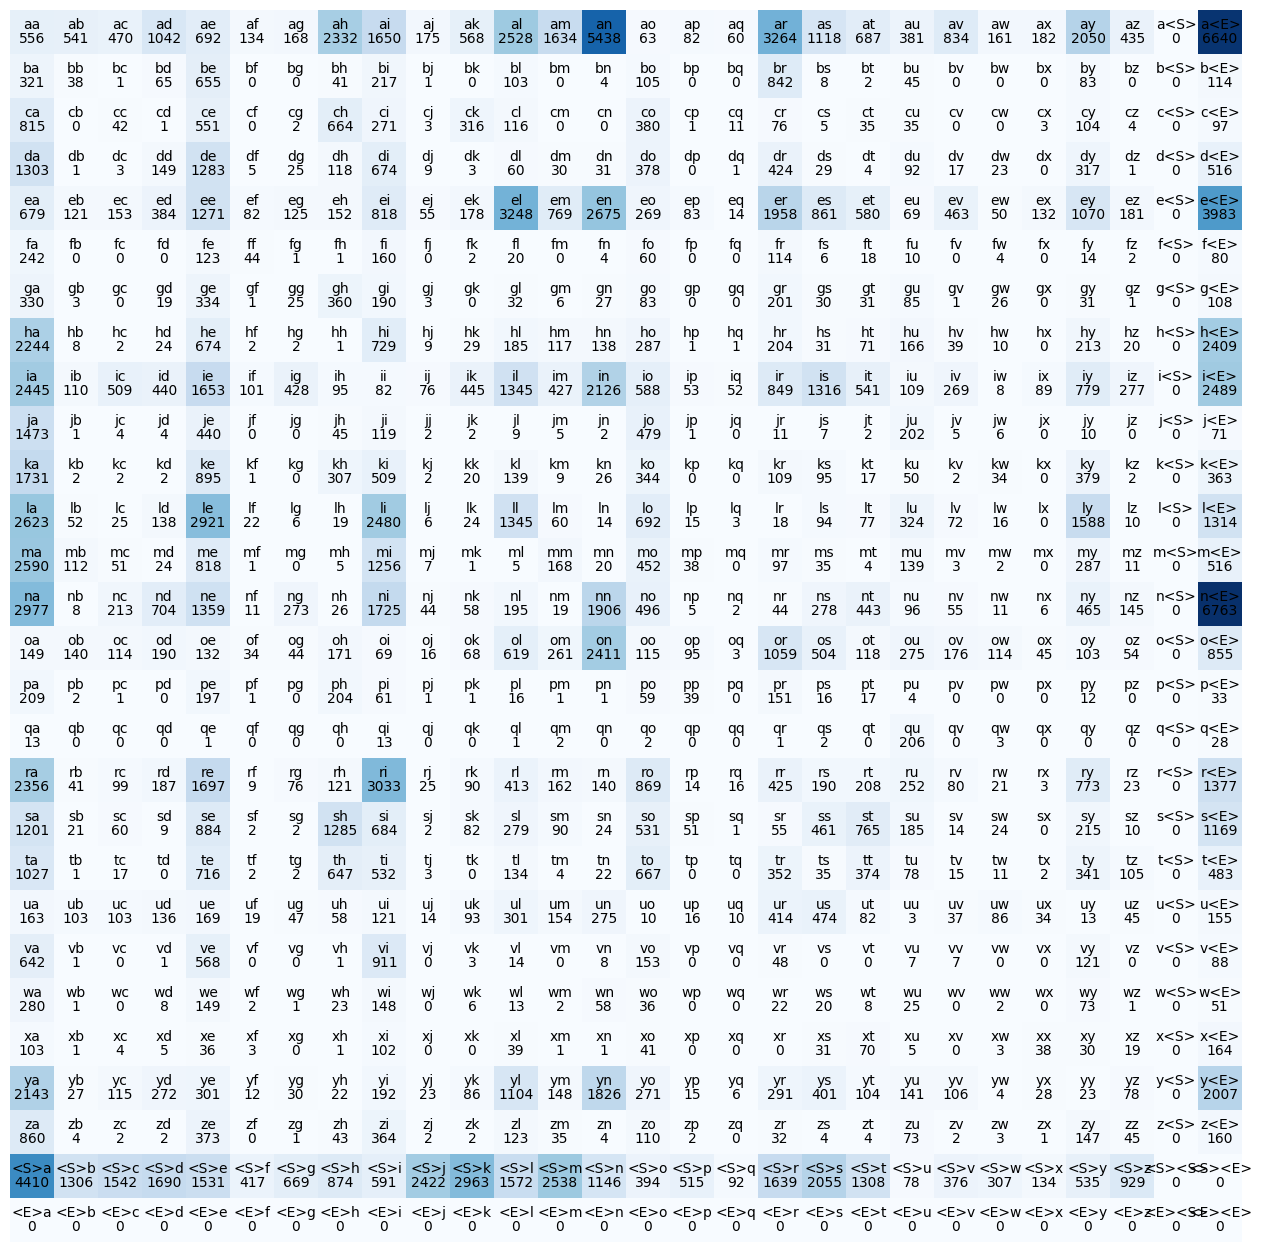

In [8]:
# visualize the count tensor 
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")
for i in range(len(itoc)):
    for j in range(len(itoc)):
        char_pair = itoc[i] + itoc[j]
        # first index is the x and the other is y
        plt.text(j, i, char_pair,     ha="center", va="bottom")
        plt.text(j, i, N[i,j].item(), ha="center", va="top")
plt.axis("off")

In [9]:
# in the counts tensor we have a redundant row(last) and a column(one before last),
# <E> never starts a name, and neither <S> ends a one. 
# here we change the special characters (tokens) to a dot(both of them)
ctoi = {c: i+1 for i, c in enumerate(unique_chars)}
ctoi["."] = 0
print(f"ctoi: {ctoi}")

itoc = {i: c for c, i in ctoi.items()}
print(f"itoc: {itoc}")

ctoi: {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
itoc: {1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


(-0.5, 27.5, 27.5, -0.5)

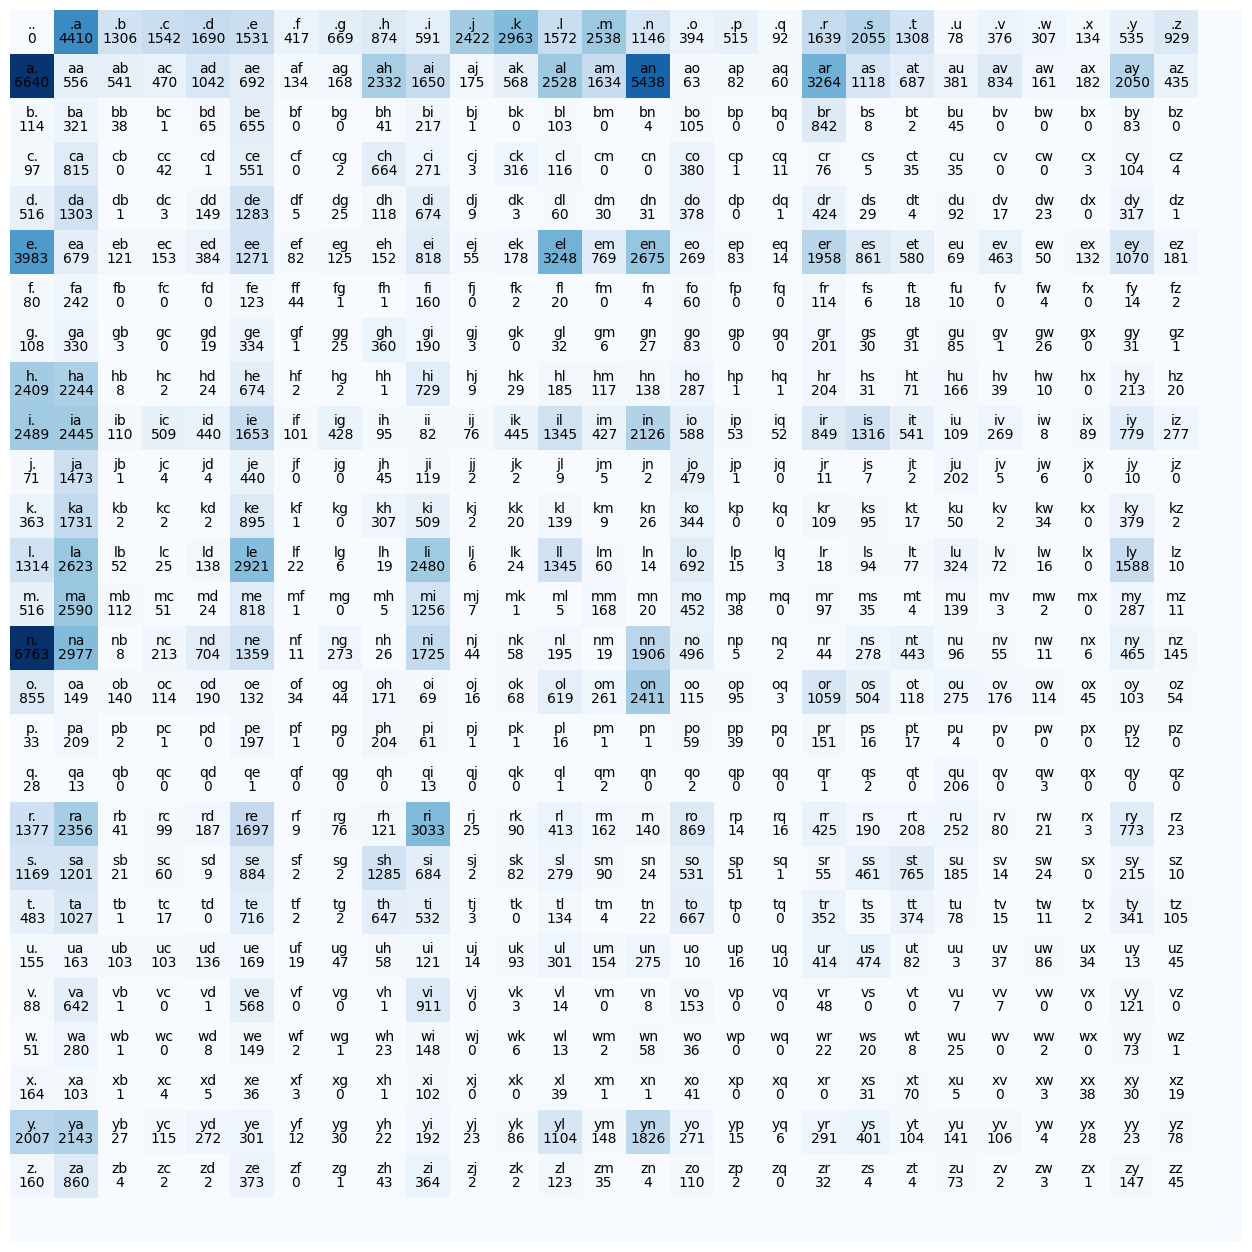

In [10]:
N = torch.zeros((28, 28), dtype=torch.int32)

for name in names:
    name = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(name, name[1:]):
        i = ctoi[ch1]
        j = ctoi[ch2]
        N[i, j] += 1

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")
for i in range(len(itoc)):
    for j in range(len(itoc)):
        char_pair = itoc[i] + itoc[j]
        # first index is the x and the other is y
        plt.text(j, i, char_pair,     ha="center", va="bottom")
        plt.text(j, i, N[i,j].item(), ha="center", va="top")
plt.axis("off")

Now we would want to sample from the count tensor, we have to convert N to a probability tensor, 
where each row sums to 1, and shows the probability of each bigram.


In [11]:
# an example prob distribution, and a multinomial sampling from it
g = torch.Generator().manual_seed(42)
prob = torch.rand(3, generator=g)
prob /= prob.sum()
print(f"probabilities: {prob}")

# now draw samples from the distribution where each index has the probability 
# of occurence according to the prob distribution values
idxs = torch.multinomial(prob, num_samples=20, replacement=True, generator=g)
print(f"indices: {idxs}")

probabilities: tensor([0.4047, 0.4197, 0.1756])
indices: tensor([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2])


In [12]:
# now we can sample some chars from the first row as an example
for i in range(10):
    sampled_chars = []
    idx = 0
    # continue sampling until we hit the end char
    while True:
        prob = N[idx].float()
        prob /= prob.sum()
        idx = torch.multinomial(prob, num_samples=1, replacement=True, generator=g).item()
        sampled_chars.append(itoc[idx])
        if idx == 0:
            break
    print(''.join(sampled_chars))

an.
da.
amiiae.
a.
keles.
ly.
a.
oy.
asityi.
pepolannezale.


As evident from the generated names above, as here we only looked to how much is probable for char to apear in certain location, the names are aweful, but compared to a uniform probability distribution, is still better.

In [13]:
for i in range(10):
    sampled_chars = []
    idx = 0
    while True:
        # we sample from a uniform distribution!
        prob = torch.ones(27)
        prob /= prob.sum()
        idx = torch.multinomial(prob, num_samples=1, replacement=True, generator=g).item()
        sampled_chars.append(itoc[idx])
        if idx == 0:
            break
    print(''.join(sampled_chars))

sjvslrumxtonaclpgcyaqxknvzioiuqrtensqvgsumjqwqeioionyyrmnyctrjzdwtyazxdbpnftaauzyskakoth.
eyumwlni.
zripawaejtxpoxkelygylxsqfdcnidebwfmbiaaewbtorpaclulyaixbxsmpsvqccgkmbr.
bcqfmfdvushlqqaspiaycg.
tnaj.
qtjaharpzjdhomfrlwzhwsuecdxlxjaffcgqinsfahigwkychfpnucnlsknkkdimfqcytgmpzildaanaonxdlcihv.
sshzdgzlgvxvtcgumtrxpsbfvvaomwnmandgevfbluadt.
rulci.
cyjipcsvpwoxarvcbzbe.
fb.


In [14]:
# instead of manually summing the rows, we can use the torch tensor operations and broadcsting rules
P = N.float()
# sum across columns(dim=1)
P /= P.sum(1, keepdims=True)

for i in range(10):
    sampled_chars = []
    idx = 0
    while True:
        # we sample from a uniform distribution!
        prob = P[idx]
        idx = torch.multinomial(prob, num_samples=1, replacement=True, generator=g).item()
        sampled_chars.append(itoc[idx])
        if idx == 0:
            break
    print(''.join(sampled_chars))

deden.
keyl.
ttap.
ckysuxo.
br.
shsh.
l.
miro.
b.
a.


We want a measure of how good our model does, something like a loss function, that we can get a sense of using a single number, here we will use, maximum likelihood estimation

In [15]:
# how much probable is a certain bigram? 
for name in names[:3]:
    name = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(name, name[1:]):
        idx1 = ctoi[ch1]
        idx2 = ctoi[ch2]
        prob = P[idx1, idx2]
        print(f"({ch1}, {ch2}): {prob:0.4f}")

(., e): 0.0478
(e, m): 0.0377
(m, m): 0.0253
(m, a): 0.3899
(a, .): 0.1960
(., o): 0.0123
(o, l): 0.0780
(l, i): 0.1777
(i, v): 0.0152
(v, i): 0.3541
(i, a): 0.1381
(a, .): 0.1960
(., a): 0.1377
(a, v): 0.0246
(v, a): 0.2495
(a, .): 0.1960


In an "untrained" model, like we had with uniform probability distribution, we expect each bigram to have a probability of roughly (1/27.0 ~ 0.037), anything above or below this 4% means we have something about the distribution of characters in our dataset.

If we take the product of all these probabilities, it should tell us something about how well our model does, in modelling the dataset. This product is the likelihood, it's the probability of the whole dataset assigned by the model. The closer to 1 it is, the better our model did in assigning the probabilities for different bigrams. As these distinct probabilities are small numbers, the products will be even smaller, for convenience people usually work with log of these numbers, called log likelihood.

In [16]:
bigram_counts = 0
log_likelihood = 0.0
for name in names[:3]:
    name = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(name, name[1:]):
        idx1 = ctoi[ch1]
        idx2 = ctoi[ch2]
        prob = P[idx1, idx2]
        # log(a*b) = log(a) + log(b)
        logprob = torch.log(prob)
        log_likelihood += logprob
        bigram_counts  += 1
        print(f"logprob({ch1}, {ch2}): {prob:0.4f} {logprob:0.4f}")

# the more closer to 0 (higher, as this can grow to -inf) the log likelihood is, the better (probabilities are close to 1),
# we would want something akin to a loss function, where the lower is better, so we use negative log likelihood
print(f"\nlog_likelihood: {log_likelihood}")
negative_log_likelihood = -log_likelihood
print(f"negative_log_likelihood: {negative_log_likelihood}")
# normalize the negative log likelihood, the average negative log likelihood
average_negative_log_likelihood = negative_log_likelihood / bigram_counts
# this is the quality measure for our model, the loss function, the lower it is, the better,
# our goal in training is to minimize this average negative log likelihood
print(f"average_negative_log_likelihood: {average_negative_log_likelihood}")


logprob(., e): 0.0478 -3.0408
logprob(e, m): 0.0377 -3.2793
logprob(m, m): 0.0253 -3.6772
logprob(m, a): 0.3899 -0.9418
logprob(a, .): 0.1960 -1.6299
logprob(., o): 0.0123 -4.3982
logprob(o, l): 0.0780 -2.5508
logprob(l, i): 0.1777 -1.7278
logprob(i, v): 0.0152 -4.1867
logprob(v, i): 0.3541 -1.0383
logprob(i, a): 0.1381 -1.9796
logprob(a, .): 0.1960 -1.6299
logprob(., a): 0.1377 -1.9829
logprob(a, v): 0.0246 -3.7045
logprob(v, a): 0.2495 -1.3882
logprob(a, .): 0.1960 -1.6299

log_likelihood: -38.78563690185547
negative_log_likelihood: 38.78563690185547
average_negative_log_likelihood: 2.424102306365967


There is a little problem in our counts tensor, in that some bigrams have zero counts, say pq, so the probability is zero, and hence the likelihood will become zero, for any words that has this bigram in it, so the log likelihood will become -inf, this is somewhat undesirable, so we do a "model smoothing", we add an arbitrary number to all the counts, say 1, so that these zero counts could vanish.

In [17]:
P = (N + 1).float()
P /= P.sum(1, keepdims=True)

bigram_counts = 0
log_likelihood = 0.0
for name in names:
    name = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(name, name[1:]):
        idx1 = ctoi[ch1]
        idx2 = ctoi[ch2]
        prob = P[idx1, idx2]
        # log(a*b) = log(a) + log(b)
        logprob = torch.log(prob)
        log_likelihood += logprob
        bigram_counts  += 1

print(f"\nlog_likelihood: {log_likelihood}")

negative_log_likelihood = -log_likelihood
print(f"negative_log_likelihood: {negative_log_likelihood}")

average_negative_log_likelihood = negative_log_likelihood / bigram_counts
print(f"average_negative_log_likelihood: {average_negative_log_likelihood}")


log_likelihood: -559978.75
negative_log_likelihood: 559978.75
average_negative_log_likelihood: 2.4544754028320312


Now we would want to cast this problem into a neural net with some weights and negative log likelihood loss function, it will take a char, and will output probabilities for likely chars that can follow the input char.

In [18]:
# an example approach with just one word,
# creating the training set with bigrams, (x, y), 
# x is the first char, the input, and y is the second char we're trying to predict, the label.
xs, ys = [], []

for name in names[:1]:
    name = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(name, name[1:]):
        idx1 = ctoi[ch1]
        idx2 = ctoi[ch2]
        print(ch1, ch2)
        xs.append(idx1)
        ys.append(idx2)
        
# in the word "emma" we have 5 examples that we can feed to neural net
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(f"xs: {xs}")
print(f"ys: {ys}")

. e
e m
m m
m a
a .
xs: tensor([ 0,  5, 13, 13,  1])
ys: tensor([ 5, 13, 13,  1,  0])


Now there is a problem, we can't just feed the xs into our neural net, these specific numbers don't have any specific meaning or value in our dataset, except that they are the index at which a specific char was present, we could have easily choses another indexing, and most likely the model would associate meaining to it. What people would do in these categorical datasets, is to use "one-hot" encoding, take a vector of 0's, the number of variables, here number of chars, and when a specific variable, char, is present in an input, put a 1 in the according place.

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])


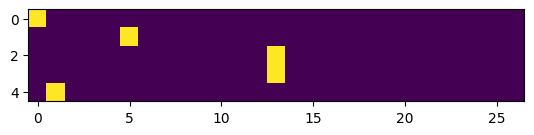

In [38]:
# mind the casting to floats, we would want to feed floats to a neural net, as opposed to ints.
# this is our forward pass, including the next cells where we exponantiate and normalize,
# this whole forward pass is composed of differentiable steps, which we can backpropagate
xenc = F.one_hot(xs, num_classes=27).float()
print(xenc)
plt.imshow(xenc)

In [22]:
# builiding a single neuron, initialize a random weight tensor, sampled from a standard normal distribution.
# a 27x1 random tensor
W = torch.randn((27, 1))
xenc @ W

tensor([[-1.5118],
        [-0.5729],
        [-1.4416],
        [-1.4416],
        [ 1.5903]])

In [28]:
# we can use 27 neurons, each neuron receives 27 inputs
W = torch.randn((27, 27))
# the firing rate of every 27 neurons on those 5 examples, a single layer net
xenc @ W

tensor([[-4.3359e-01, -5.5756e-01, -1.1737e+00, -2.5978e-01, -1.2528e-01,
         -1.1255e+00,  2.6747e-01,  8.2509e-01,  1.5541e+00,  2.2442e+00,
         -2.2492e-01, -5.1632e-01,  6.6091e-01, -4.5161e-01,  7.5119e-01,
          1.3717e+00, -7.5399e-02, -3.1173e-01,  5.9148e-01, -1.0501e+00,
         -9.7403e-01,  6.8785e-01, -1.3407e+00,  2.1653e-01, -2.9889e-01,
         -6.3268e-01, -1.6892e-01],
        [-6.9546e-01,  6.7630e-01,  1.4179e+00, -1.7633e+00,  7.5706e-01,
          1.3539e+00,  1.7579e-01,  6.3053e-01, -8.7138e-01, -2.9126e-01,
          2.0474e+00,  5.9091e-01,  1.6592e+00,  1.3530e+00, -2.9962e+00,
          1.0155e+00, -1.0984e+00, -8.2809e-01,  9.9757e-01,  1.6005e-01,
          2.1416e-01,  1.0237e+00, -5.0965e-01,  1.1712e-01, -3.1613e-01,
         -1.0408e+00, -3.2272e+00],
        [-1.7122e+00,  6.8692e-01, -4.9740e-02,  1.5077e+00, -1.7877e+00,
         -3.2783e-01, -2.1646e+00,  1.1828e+00, -4.7313e-01,  5.4156e-01,
          1.0631e-03, -1.5212e+00,  1.30

We need a way to interpret these numbers that include minus floats. In the count martix, we had the individual counts of the bigrams, we normailized them and got the probabilities, we would want something like that out of our neural net, something that would give us the probabilities of each bigram. The way we can achieve this is by interpreting these 27 numbers as the *log counts* or *logits*. To get the counts, we exponantiate the logits.

In [30]:
logits = xenc @ W
counts = logits.exp()
counts

tensor([[0.6482, 0.5726, 0.3092, 0.7712, 0.8822, 0.3245, 1.3067, 2.2821, 4.7307,
         9.4327, 0.7986, 0.5967, 1.9366, 0.6366, 2.1195, 3.9420, 0.9274, 0.7322,
         1.8067, 0.3499, 0.3776, 1.9894, 0.2617, 1.2418, 0.7416, 0.5312, 0.8446],
        [0.4988, 1.9666, 4.1284, 0.1715, 2.1320, 3.8726, 1.1922, 1.8786, 0.4184,
         0.7473, 7.7477, 1.8056, 5.2553, 3.8691, 0.0500, 2.7608, 0.3334, 0.4369,
         2.7117, 1.1736, 1.2388, 2.7835, 0.6007, 1.1243, 0.7290, 0.3532, 0.0397],
        [0.1805, 1.9876, 0.9515, 4.5162, 0.1673, 0.7205, 0.1148, 3.2634, 0.6230,
         1.7187, 1.0011, 0.2185, 3.6734, 2.9961, 0.0916, 3.7786, 1.1237, 1.8661,
         0.8177, 4.3517, 5.8999, 0.4433, 1.0099, 0.2744, 0.4203, 1.5406, 1.0475],
        [0.1805, 1.9876, 0.9515, 4.5162, 0.1673, 0.7205, 0.1148, 3.2634, 0.6230,
         1.7187, 1.0011, 0.2185, 3.6734, 2.9961, 0.0916, 3.7786, 1.1237, 1.8661,
         0.8177, 4.3517, 5.8999, 0.4433, 1.0099, 0.2744, 0.4203, 1.5406, 1.0475],
        [1.0792, 3.0652,

In [36]:
probs = counts / counts.sum(dim=1, keepdims=True)
probs

tensor([[0.0158, 0.0139, 0.0075, 0.0188, 0.0215, 0.0079, 0.0318, 0.0555, 0.1151,
         0.2295, 0.0194, 0.0145, 0.0471, 0.0155, 0.0516, 0.0959, 0.0226, 0.0178,
         0.0440, 0.0085, 0.0092, 0.0484, 0.0064, 0.0302, 0.0180, 0.0129, 0.0206],
        [0.0100, 0.0393, 0.0825, 0.0034, 0.0426, 0.0774, 0.0238, 0.0376, 0.0084,
         0.0149, 0.1549, 0.0361, 0.1051, 0.0774, 0.0010, 0.0552, 0.0067, 0.0087,
         0.0542, 0.0235, 0.0248, 0.0556, 0.0120, 0.0225, 0.0146, 0.0071, 0.0008],
        [0.0040, 0.0444, 0.0212, 0.1008, 0.0037, 0.0161, 0.0026, 0.0728, 0.0139,
         0.0384, 0.0223, 0.0049, 0.0820, 0.0669, 0.0020, 0.0843, 0.0251, 0.0417,
         0.0183, 0.0971, 0.1317, 0.0099, 0.0225, 0.0061, 0.0094, 0.0344, 0.0234],
        [0.0040, 0.0444, 0.0212, 0.1008, 0.0037, 0.0161, 0.0026, 0.0728, 0.0139,
         0.0384, 0.0223, 0.0049, 0.0820, 0.0669, 0.0020, 0.0843, 0.0251, 0.0417,
         0.0183, 0.0971, 0.1317, 0.0099, 0.0225, 0.0061, 0.0094, 0.0344, 0.0234],
        [0.0208, 0.0590,

so for example, $probs[0]$, represents the probabilities of each character in our vocabulary, 27 of them, following the dot(.), the 0'th row in our one-hot encoded input, x. Note that here we just used one data point,".emma." as our dataset.

In [37]:
prob[0].sum()

tensor(1.)

The steps involving exponantiation `counts=logits.exp()` and normalization, `probs=counts/counts.sum(1, keepdims=True)` are called the *softmax* function:

$$
softmax(z) = \frac{e^{z_i}}{\sum_{j=1}^{K}e^z_j}
$$

$Z_i$'s are the logits.

Softmax takes the output of a neural layer which can be positive or negative real numbers, and outputs a probability distribution summing to 1.

In [44]:
# negative log likelihoods
nlls = torch.zeros(5)
# 5 examples (bigrams) in the word "emma" 
for i in range(5):
    print(20*'*')
    x = xs[i].item() # input char index
    y = ys[i].item() # label char index
    
    print(f"bigram {i+1} ({x},{y}): {itoc[x]}{itoc[y]}")
    print(f"input to neural net: {x}")
    print(f"output probabilities from neural net:\n {probs[i]}")
    print(f"actual next char (label): {y}")
    
    p = probs[i, y]
    print(f"probability assigned by the net to the correct char: {p.item()}")
    
    logp = torch.log(p)
    print(f"log likelihood: {logp.item()}")
    nll = -logp
    print(f"negative log likelihood: {nll.item()}")
    nlls[i] = nll
    
    print(10*'-')
    print(f"average negative log likelihood (loss): {nlls.mean().item()}")

********************
bigram 1 (0,5): .e
input to neural net: 0
output probabilities from neural net:
 tensor([0.0158, 0.0139, 0.0075, 0.0188, 0.0215, 0.0079, 0.0318, 0.0555, 0.1151,
        0.2295, 0.0194, 0.0145, 0.0471, 0.0155, 0.0516, 0.0959, 0.0226, 0.0178,
        0.0440, 0.0085, 0.0092, 0.0484, 0.0064, 0.0302, 0.0180, 0.0129, 0.0206])
actual next char (label): 5
probability assigned by the net to the correct char: 0.007896311581134796
log likelihood: -4.841359615325928
negative log likelihood: 4.841359615325928
----------
average negative log likelihood (loss): 0.9682719111442566
********************
bigram 2 (5,13): em
input to neural net: 5
output probabilities from neural net:
 tensor([0.0100, 0.0393, 0.0825, 0.0034, 0.0426, 0.0774, 0.0238, 0.0376, 0.0084,
        0.0149, 0.1549, 0.0361, 0.1051, 0.0774, 0.0010, 0.0552, 0.0067, 0.0087,
        0.0542, 0.0235, 0.0248, 0.0556, 0.0120, 0.0225, 0.0146, 0.0071, 0.0008])
actual next char (label): 13
probability assigned by the net to